Notebook for characterizing roughly Gaussian beams

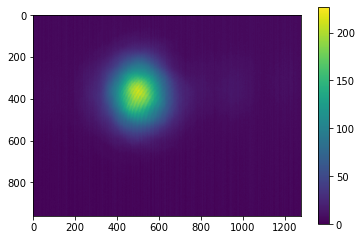

In [4]:
# Import libraries
from PIL import Image
import os
import numpy
import matplotlib.pyplot as plt
import scipy.optimize as opt
import numpy as np
import pylab as plt


# Define 1DGaussian function
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

# Define 2DGaussian function
# sigma is std dev
def twoD_Gaussian(xdata_tuple, amplitude, xo, yo, sigma_x, sigma_y, offset):
    (x, y) = xdata_tuple                                                        
    xo = float(xo)                                                              
    yo = float(yo)                                                              
    a = 1/(2*sigma_x**2)      
    c = 1/(2*sigma_y**2)   
    g = offset + amplitude*np.exp( - (a*((x-xo)**2) + c*((y-yo)**2)))               
    return g.ravel()

# Import image
file_location = "C:\\Users\\Lithium\\Documents\\image-processing\\beam-profiling\\401nm_7.22.22"
im_name = os.path.join(file_location, "location_4.bmp")
img = Image.open(im_name)
np_img = numpy.array(img)

data=np_img[:,:,2]

# Create x and y indices
x0 = np.linspace(0, np.shape(data)[0], np.shape(data)[0])
y0 = np.linspace(0, np.shape(data)[1], np.shape(data)[1])
x, y = np.meshgrid(x0, y0,indexing='ij')

# Plot
plt.figure()
plt.imshow(data)
plt.colorbar();

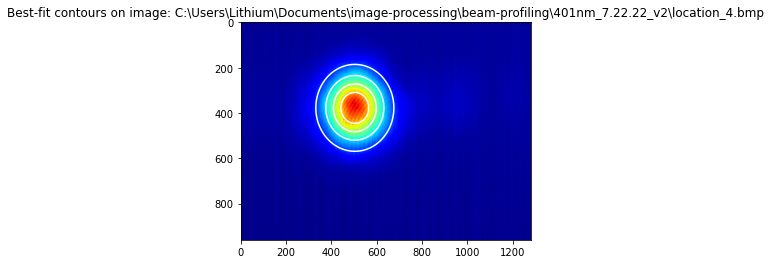

BEAM PARAMETERS
amplitude: 192.271 \pm 0.023
X0: 377.148 \pm 0.012
Y0: 503.451 \pm 0.011
sigma_x: 103.626 \pm 0.013
sigma_y: 93.065 \pm 0.011
offset: 5.341 \pm 0.003


In [5]:
# 2D fit

# init_params = amplitude, xo, yo, sigma_x, sigma_y, offset
initial_guess = (250,300,500,100,100,20)

popt, pcov = opt.curve_fit(twoD_Gaussian, (x, y), np.ravel(data), p0=initial_guess)

# Get standard deviation of fitted parameters
perr = np.sqrt(np.diag(pcov))

# Plot fit
data_fitted = twoD_Gaussian((x, y), *popt)

fig, ax = plt.subplots(1, 1)
ax.imshow(data, cmap=plt.cm.jet)
ax.contour(y, x, data_fitted.reshape(np.shape(data)[0], np.shape(data)[1]), 5, colors='w')
plt.title('Best-fit contours on image: '+im_name)
plt.show();

print('BEAM PARAMETERS')
print('amplitude: %3.3f \pm %3.3f' % (popt[0], perr[0]))
print('X0: %3.3f \pm %3.3f' % (popt[1], perr[1]))
print('Y0: %3.3f \pm %3.3f' % (popt[2], perr[2]))
print('sigma_x: %3.3f \pm %3.3f' % (popt[3], perr[3]))
print('sigma_y: %3.3f \pm %3.3f' % (popt[4], perr[4]))
print('offset: %3.3f \pm %3.3f' % (popt[5], perr[5]))

In [6]:
# Calculate beam waist in millimeters
# TODO: figure out how waist and std dev are related
# TODO: add in chi sqaured value

# Convert from pixels into mm for Allied Electronics camera 1800 U-120c
# Pixel size of 3.75 um x 3.75 um

# waist_x = 2*round(popt[3], 3)

# print('waist_x = ')



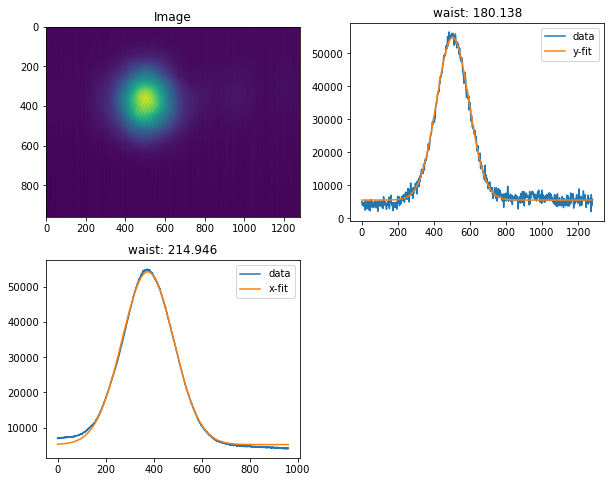

In [7]:
#Trying x and y separately
Ix = np.transpose(np.sum(data, axis=1))
Iy = np.transpose(np.sum(data, axis=0))

xparams, xcov = opt.curve_fit(gauss, x0, Ix,p0=[min(Ix),max(Ix),np.argmax(Ix),100])
fit_Ix = gauss(x0, *xparams)

yparams, ycov = opt.curve_fit(gauss, y0, Iy,p0=[min(Iy),max(Iy),np.argmax(Iy),100])
fit_Iy = gauss(y0, *yparams)

#Plot
fig = plt.figure(figsize = (10, 8))
plt.subplot(2,2,1)
plt.imshow(data)
plt.title('Image')

plt.subplot(2,2,3)
plt.plot(x0, Ix, label='data')
plt.plot(x0, fit_Ix, '-', label='x-fit')
plt.title('waist: '+str(2*round(xparams[3],3)))
plt.legend();

plt.subplot(2,2,2)
plt.plot(y0, Iy, label='data')
plt.plot(y0, fit_Iy, '-', label='y-fit')
plt.title('waist: '+str(2*round(yparams[3],3)))
plt.legend();


mean waist (mm): 0.710 
Rayleigh length (m): 3.946


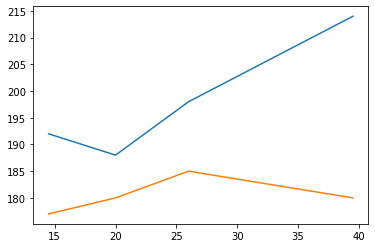

In [34]:
# Find the mean beam waist for the 401nm light from images in ...\\401nm_7.22.22
positions = [14.5, 20, 26, 39.5]
x_waists = [192, 188, 198, 214]
y_waists = [177, 180, 185, 180]

mean_waist = (np.mean(x_waists)+np.mean(y_waists))/2

print('mean waist (mm): %3.3f ' % (mean_waist*3.75*10**(-6)*10**(3)))
print('Rayleigh length (m): %3.3f' % (np.pi*(mean_waist*3.75*10**(-6))**2/(401*10**(-9))))

plt.figure()
plt.plot(positions, x_waists, label='x waist')
plt.plot(positions, y_waists, label='y waist')
plt.show()

In [35]:
np.pi*(0.71*10**(-3))**2/(401*10**(-9))

3.9493188445751

In [24]:
3.75*10**(-6)*190/0.5*75

0.10687499999999998

In [25]:
3.75*10**(-6)*190

0.0007124999999999999